In [7]:
import os
import json
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
 
sub_dirs = ['cloudy and medium wave', 'evening calm', 'evening rain calm sea', 'foggy and calm sea']

 
image_data = []
annotation_data = []

 
for sub_dir in sub_dirs:
    image_dir = os.path.join(sub_dir, 'images')
    text_dir = os.path.join(sub_dir, 'text')
    
    
    for text_file in os.listdir(text_dir):
        if text_file.endswith('.txt'):
            text_path = os.path.join(text_dir, text_file)
            
            with open(text_path, 'r') as f:
                json_string = f.read().strip()
            
            
            json_string = ast.literal_eval(json_string)
            annotation = json.loads(json_string)
            
            annotation_data.append(annotation)
            
            
            image_file = text_file.replace('RawMeta', 'CamFeed').replace('.txt', '.png')
            image_path = os.path.join(image_dir, image_file)
            
            if os.path.exists(image_path):
                image_data.append(image_path)
 
rows = []
for annotation in annotation_data:
    for obj in annotation['TrackedObj']:
        for bb in obj['BB2D']:
            rows.append({
                'ObjectName': obj['ObjectName'],
                'Alias': obj['Alias'],
                'X': bb['X'],
                'Y': bb['Y']
            })

annotations_df = pd.DataFrame(rows)


In [8]:
print(annotations_df.info())
print(annotations_df.describe())
print(annotations_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78244 entries, 0 to 78243
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ObjectName  78244 non-null  object 
 1   Alias       78244 non-null  object 
 2   X           78244 non-null  float64
 3   Y           78244 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.4+ MB
None
                  X             Y
count  7.824400e+04  7.824400e+04
mean   8.615410e+02  2.105083e+02
std    8.396921e+04  1.534387e+04
min   -8.764652e+06 -3.789790e+06
25%    3.701557e+02  3.463194e+02
50%    5.927957e+02  3.580275e+02
75%    7.900362e+02  3.643247e+02
max    1.327930e+07  5.538333e+04
ObjectName    0
Alias         0
X             0
Y             0
dtype: int64


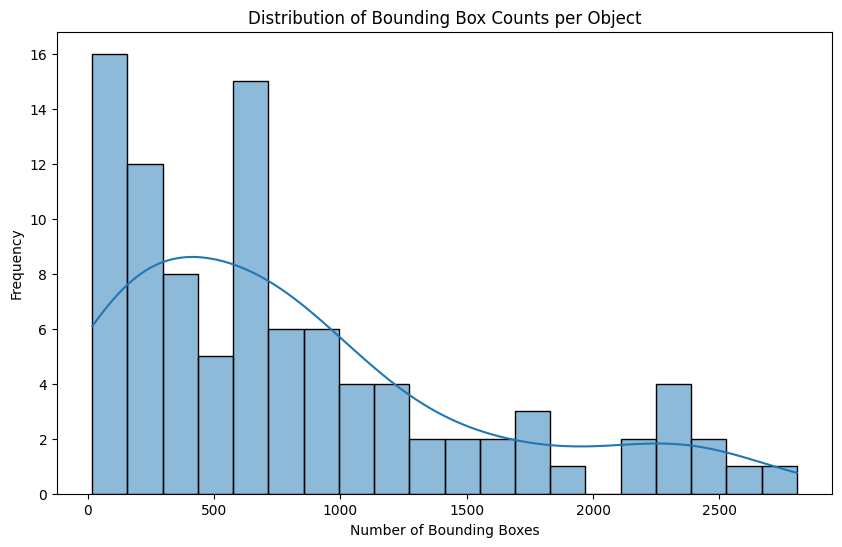

In [9]:
 
bbox_counts = annotations_df.groupby(['ObjectName', 'Alias']).size().reset_index(name='bbox_count')

plt.figure(figsize=(10, 6))
sns.histplot(bbox_counts['bbox_count'], bins=20, kde=True)
plt.title('Distribution of Bounding Box Counts per Object')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Alias', data=annotations_df, palette='tab20', s=100, alpha=0.7)
plt.title('Bounding Box Coordinates by Object Alias')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


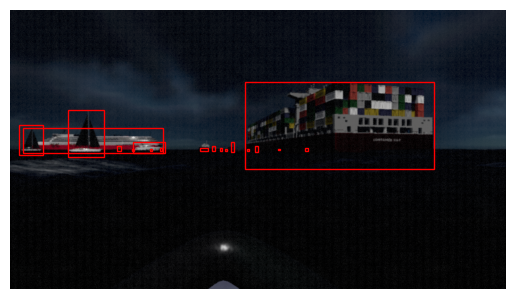

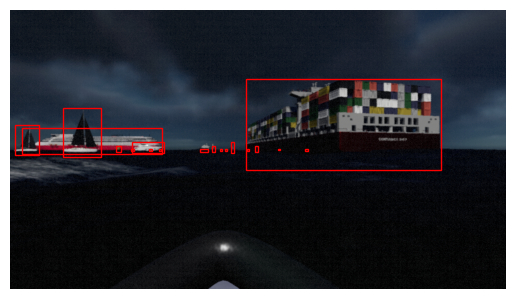

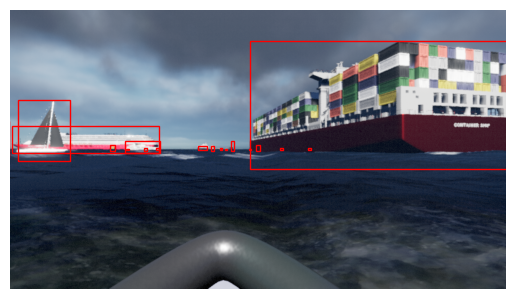

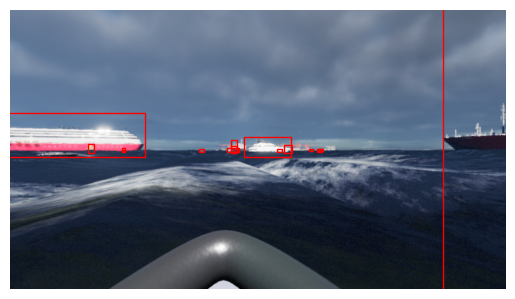

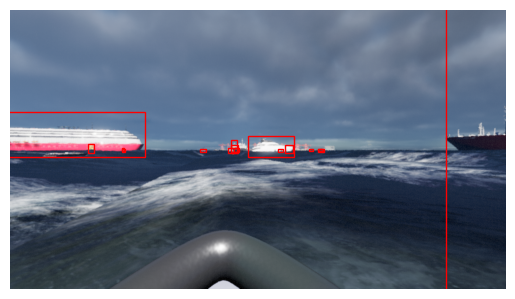

In [12]:
 
def plot_image_with_bboxes(image_path, tracked_objects):
    image = Image.open(image_path)
    plt.imshow(image)
    
    for obj in tracked_objects:
        bbox = obj['BB2D']
        if len(bbox) >= 2:
            x1, y1 = bbox[0]['X'], bbox[0]['Y']
            x2, y2 = bbox[1]['X'], bbox[1]['Y']
            width, height = x2 - x1, y2 - y1
            rect = plt.Rectangle((x1, y1), width, height, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
    
    plt.axis('off')
    plt.show()

 
for i in range(min(5, len(image_data))):
    plot_image_with_bboxes(image_data[i], annotation_data[i]['TrackedObj'])

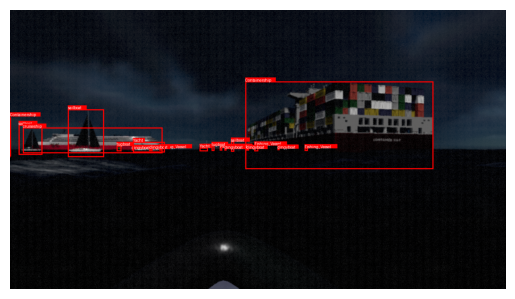

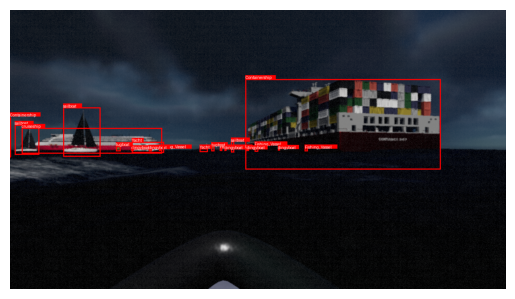

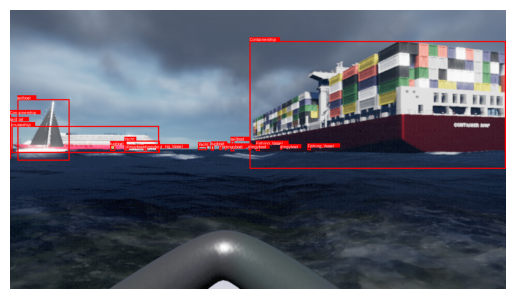

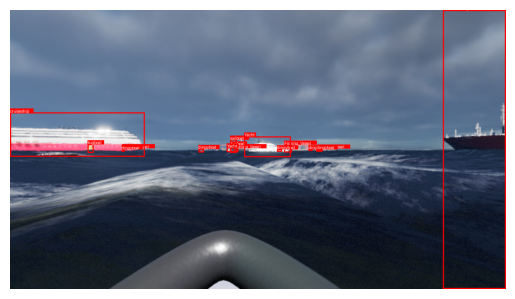

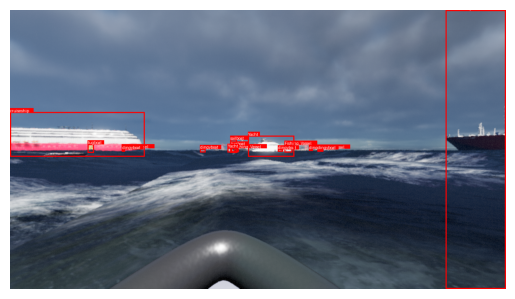

In [17]:
from PIL import ImageDraw, ImageFont
 
def plot_image_with_bboxes(image_path, tracked_objects):
    image = Image.open(image_path)
    width, height = image.size
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    
    for obj in tracked_objects:
        alias = obj['Alias']
        bbox = obj['BB2D']
        if len(bbox) >= 2:
            x1 = max(0, min(width - 1, bbox[0]['X']))
            y1 = max(0, min(height - 1, bbox[0]['Y']))
            x2 = max(0, min(width - 1, bbox[1]['X']))
            y2 = max(0, min(height - 1, bbox[1]['Y']))
            
           
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
            
            
            label = alias
            draw.rectangle([x1, y1 - 10, x1 + len(label) * 6, y1], fill="red")
            draw.text((x1, y1 - 10), label, font=font, fill="white")
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

 
for i in range(min(5, len(image_data))):
    plot_image_with_bboxes(image_data[i], annotation_data[i]['TrackedObj'])

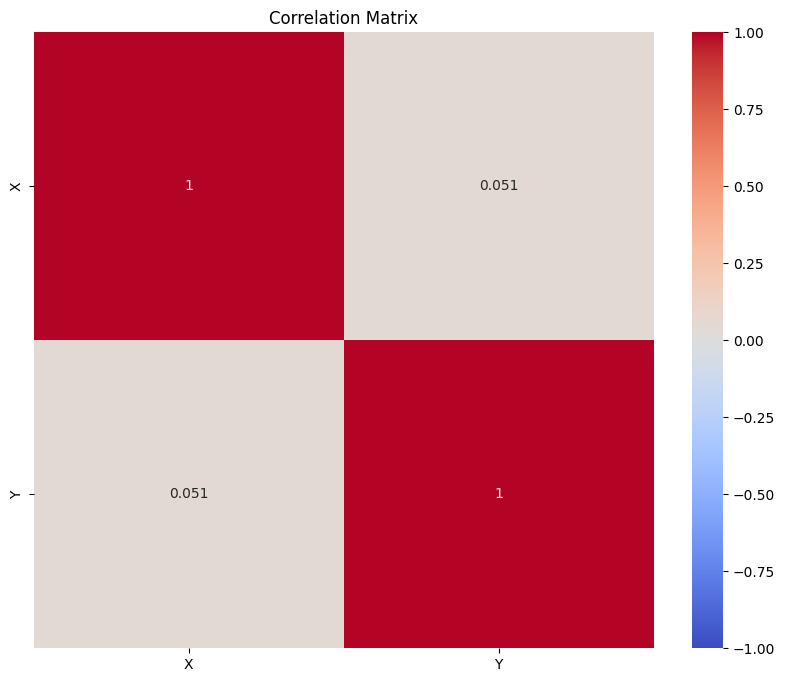

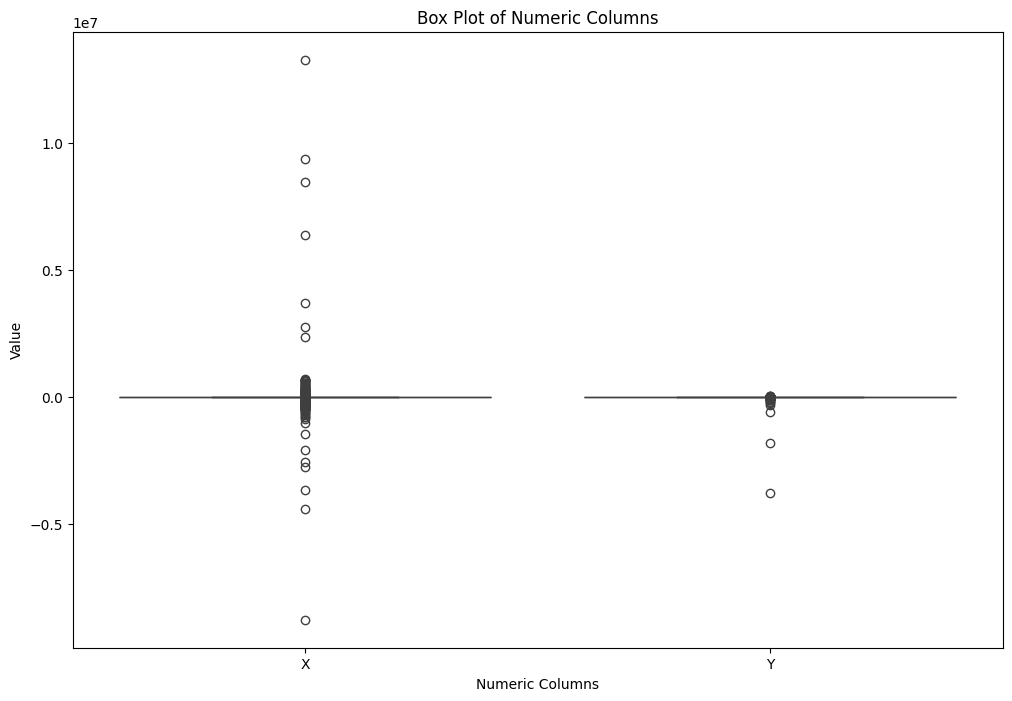

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_correlations_and_outliers(df):
    """
    Analyze correlations and outliers in the given DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the dataset.
    """
    # Select only numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=[float, int])
    
    # Correlation matrix
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Outliers detection using box plots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=numeric_df)
    plt.title('Box Plot of Numeric Columns')
    plt.xlabel('Numeric Columns')
    plt.ylabel('Value')
    plt.show()

# Perform the analysis on the annotations DataFrame
analyze_correlations_and_outliers(annotations_df)


                            folder           filename   sharpness   contrast  \
0    cloudy and medium wave/images    0_CamFeed_0.png  842.556203   8.584763   
1    cloudy and medium wave/images    0_CamFeed_1.png  911.281836   9.296749   
2    cloudy and medium wave/images   0_CamFeed_10.png  364.307996  10.611642   
3    cloudy and medium wave/images  0_CamFeed_100.png  301.537279  10.011643   
4    cloudy and medium wave/images  0_CamFeed_101.png  179.533713  10.155574   
..                             ...                ...         ...        ...   
541  cloudy and medium wave/images   0_CamFeed_95.png  347.189962   9.767950   
542  cloudy and medium wave/images   0_CamFeed_96.png  288.516487   9.762061   
543  cloudy and medium wave/images   0_CamFeed_97.png  312.477288   9.771927   
544  cloudy and medium wave/images   0_CamFeed_98.png  342.485833   9.805198   
545  cloudy and medium wave/images   0_CamFeed_99.png  306.365021   9.901699   

         noise   lighting  
0    20.779

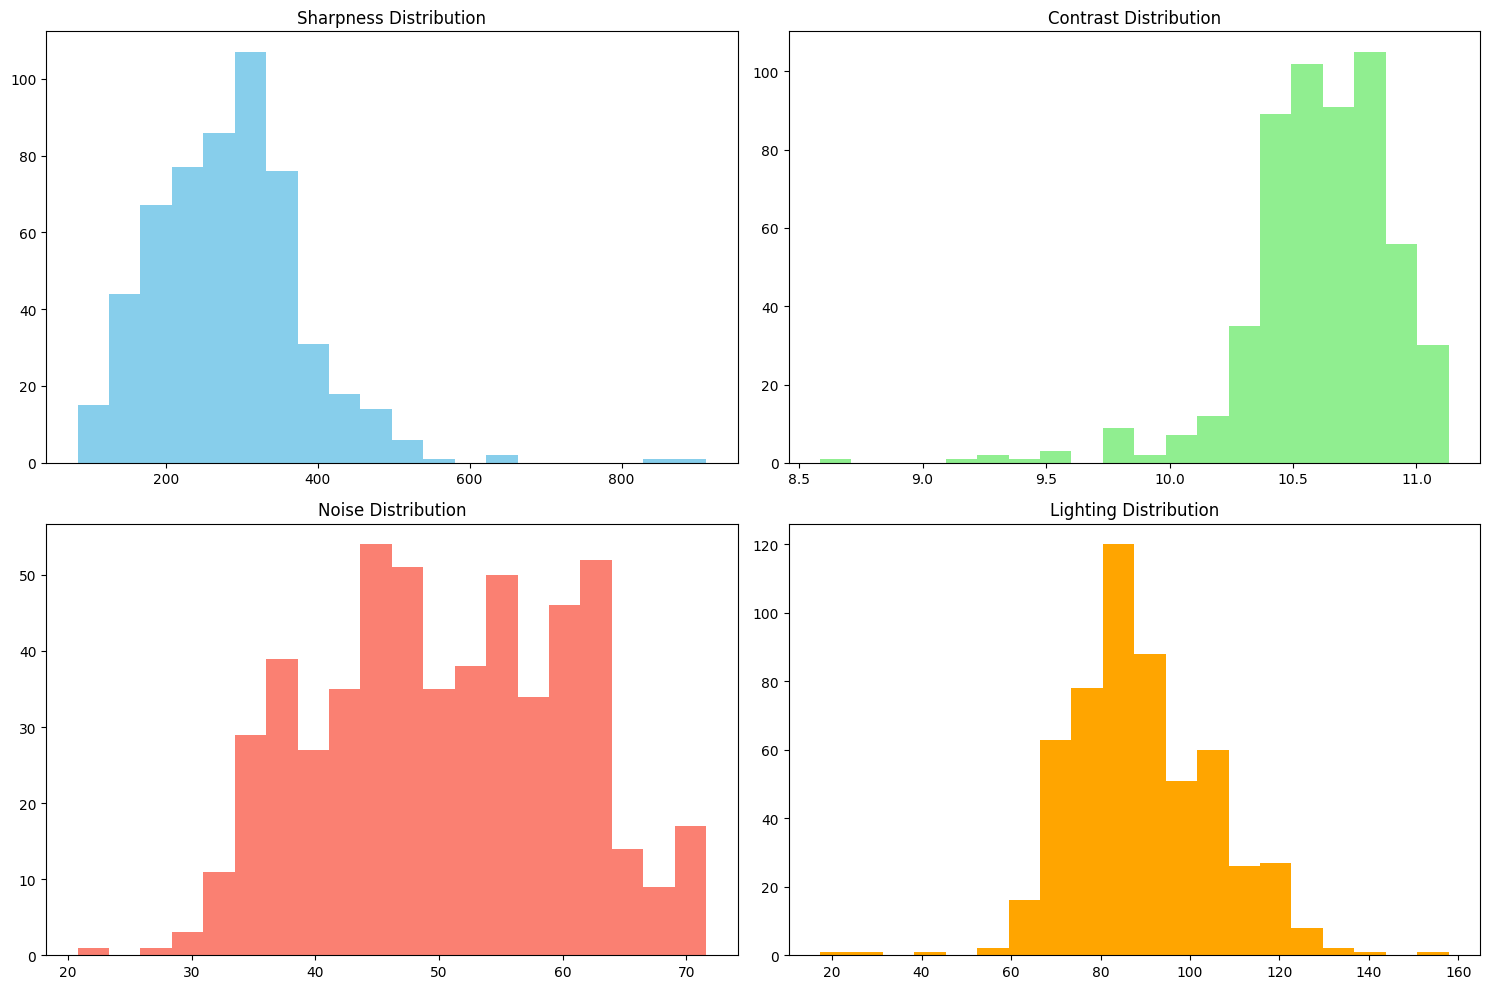

In [5]:
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

def compute_sharpness(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

def compute_contrast(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rms_contrast = np.sqrt(np.mean(gray_image**2))
    return rms_contrast

def compute_noise(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise_std = np.std(gray_image)
    return noise_std

def compute_lighting(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    return mean_brightness

def analyze_image_quality(root_folder):
    metrics = []
    
    for subdir, _, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subdir, filename)
                image = cv2.imread(image_path)
                
                if image is not None:
                    sharpness = compute_sharpness(image)
                    contrast = compute_contrast(image)
                    noise = compute_noise(image)
                    lighting = compute_lighting(image)
                    
                    metrics.append({
                        'folder': subdir,
                        'filename': filename,
                        'sharpness': sharpness,
                        'contrast': contrast,
                        'noise': noise,
                        'lighting': lighting
                    })
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

 
root_folder = 'cloudy and medium wave/images'   

 
image_metrics_df = analyze_image_quality(root_folder)

 
image_metrics_df.to_csv('image_quality_metrics.csv', index=False)

print(image_metrics_df)

 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].hist(image_metrics_df['sharpness'], bins=20, color='skyblue')
axes[0, 0].set_title('Sharpness Distribution')

axes[0, 1].hist(image_metrics_df['contrast'], bins=20, color='lightgreen')
axes[0, 1].set_title('Contrast Distribution')

axes[1, 0].hist(image_metrics_df['noise'], bins=20, color='salmon')
axes[1, 0].set_title('Noise Distribution')

axes[1, 1].hist(image_metrics_df['lighting'], bins=20, color='orange')
axes[1, 1].set_title('Lighting Distribution')

plt.tight_layout()
plt.show()


                  folder           filename   sharpness   contrast      noise  \
0    evening calm/images    0_CamFeed_0.png  803.816694   8.559165  19.576850   
1    evening calm/images    0_CamFeed_1.png  863.705438   9.023132  27.082033   
2    evening calm/images   0_CamFeed_10.png  668.834441  10.035331  55.743878   
3    evening calm/images  0_CamFeed_100.png  553.016487  10.391024  41.242893   
4    evening calm/images  0_CamFeed_101.png  531.768766  10.188700  42.603725   
..                   ...                ...         ...        ...        ...   
813  evening calm/images   0_CamFeed_95.png  550.890769  10.322349  43.138911   
814  evening calm/images   0_CamFeed_96.png  575.947667  10.310944  42.865855   
815  evening calm/images   0_CamFeed_97.png  456.017069  10.218720  42.739672   
816  evening calm/images   0_CamFeed_98.png  562.489446  10.244481  42.414571   
817  evening calm/images   0_CamFeed_99.png  486.851482  10.147517  42.937124   

      lighting  
0    17.90

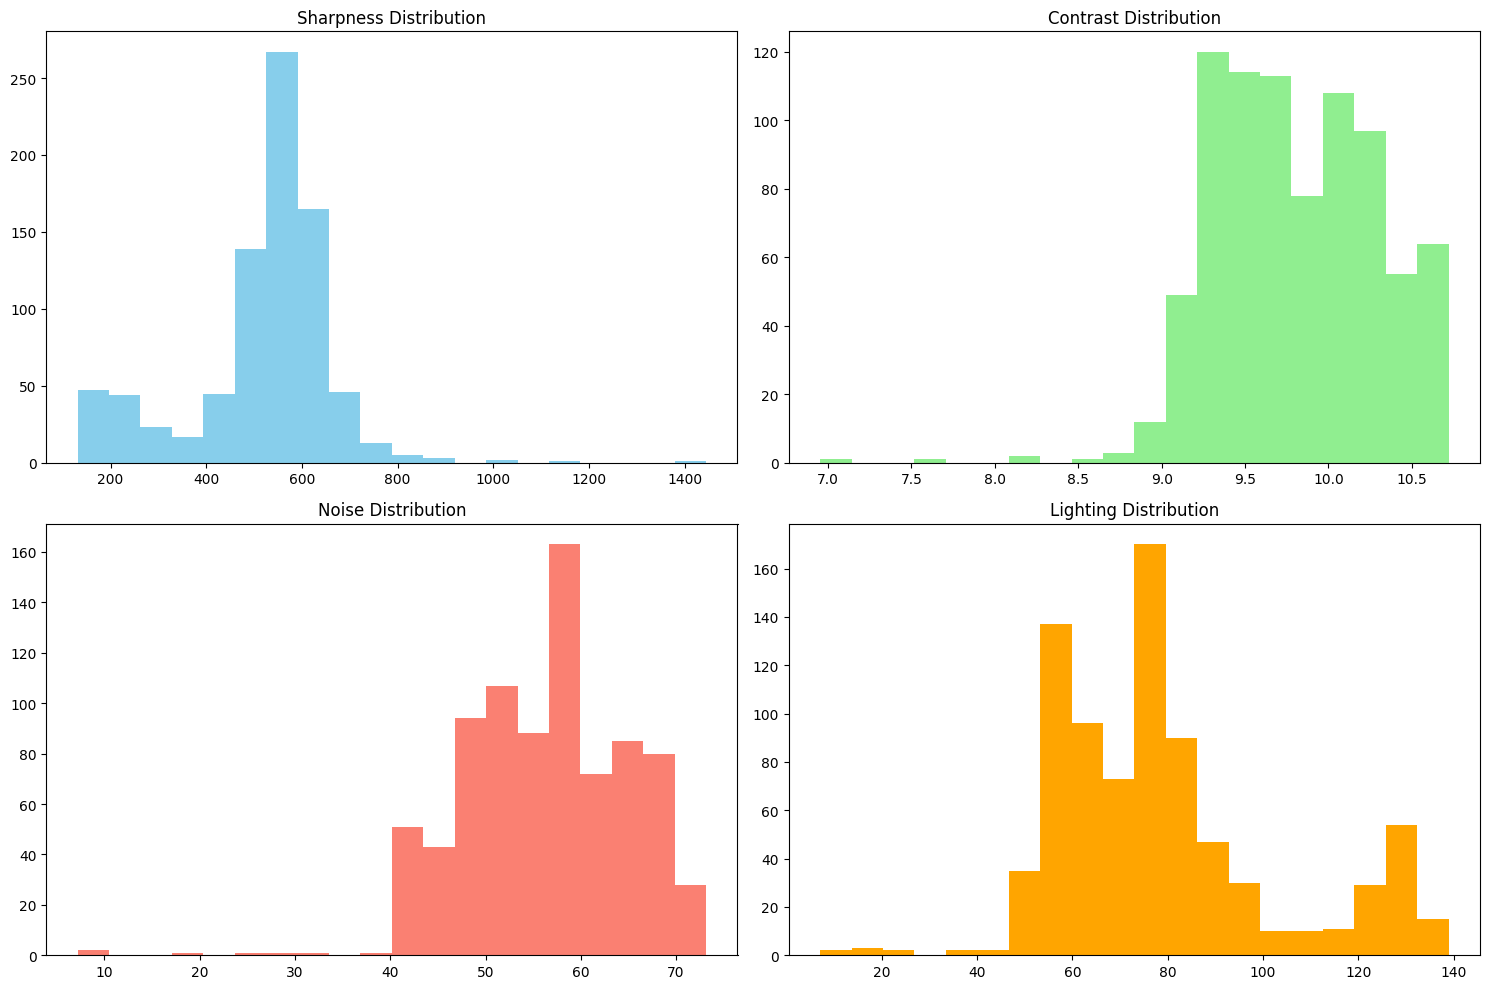

In [1]:
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

def compute_sharpness(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

def compute_contrast(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rms_contrast = np.sqrt(np.mean(gray_image**2))
    return rms_contrast

def compute_noise(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise_std = np.std(gray_image)
    return noise_std

def compute_lighting(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    return mean_brightness

def analyze_image_quality(root_folder):
    metrics = []
    
    for subdir, _, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subdir, filename)
                image = cv2.imread(image_path)
                
                if image is not None:
                    sharpness = compute_sharpness(image)
                    contrast = compute_contrast(image)
                    noise = compute_noise(image)
                    lighting = compute_lighting(image)
                    
                    metrics.append({
                        'folder': subdir,
                        'filename': filename,
                        'sharpness': sharpness,
                        'contrast': contrast,
                        'noise': noise,
                        'lighting': lighting
                    })
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

 
root_folder = 'evening calm/images'   

 
image_metrics_df = analyze_image_quality(root_folder)

 
image_metrics_df.to_csv('image_quality_metrics.csv', index=False)

print(image_metrics_df)

 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].hist(image_metrics_df['sharpness'], bins=20, color='skyblue')
axes[0, 0].set_title('Sharpness Distribution')

axes[0, 1].hist(image_metrics_df['contrast'], bins=20, color='lightgreen')
axes[0, 1].set_title('Contrast Distribution')

axes[1, 0].hist(image_metrics_df['noise'], bins=20, color='salmon')
axes[1, 0].set_title('Noise Distribution')

axes[1, 1].hist(image_metrics_df['lighting'], bins=20, color='orange')
axes[1, 1].set_title('Lighting Distribution')

plt.tight_layout()
plt.show()


                            folder            filename    sharpness  \
0     evening rain calm sea/images     0_CamFeed_0.png  1148.980532   
1     evening rain calm sea/images     0_CamFeed_1.png   949.796122   
2     evening rain calm sea/images    0_CamFeed_10.png   659.403093   
3     evening rain calm sea/images   0_CamFeed_100.png   845.779176   
4     evening rain calm sea/images  0_CamFeed_1000.png   859.245709   
...                            ...                 ...          ...   
1398  evening rain calm sea/images   0_CamFeed_995.png   669.941778   
1399  evening rain calm sea/images   0_CamFeed_996.png   824.281299   
1400  evening rain calm sea/images   0_CamFeed_997.png   732.036282   
1401  evening rain calm sea/images   0_CamFeed_998.png   874.749399   
1402  evening rain calm sea/images   0_CamFeed_999.png   799.953169   

       contrast      noise   lighting  
0      8.518111  14.153355  13.949868  
1      8.955337  19.229376  19.363145  
2      9.994443  55.791196 

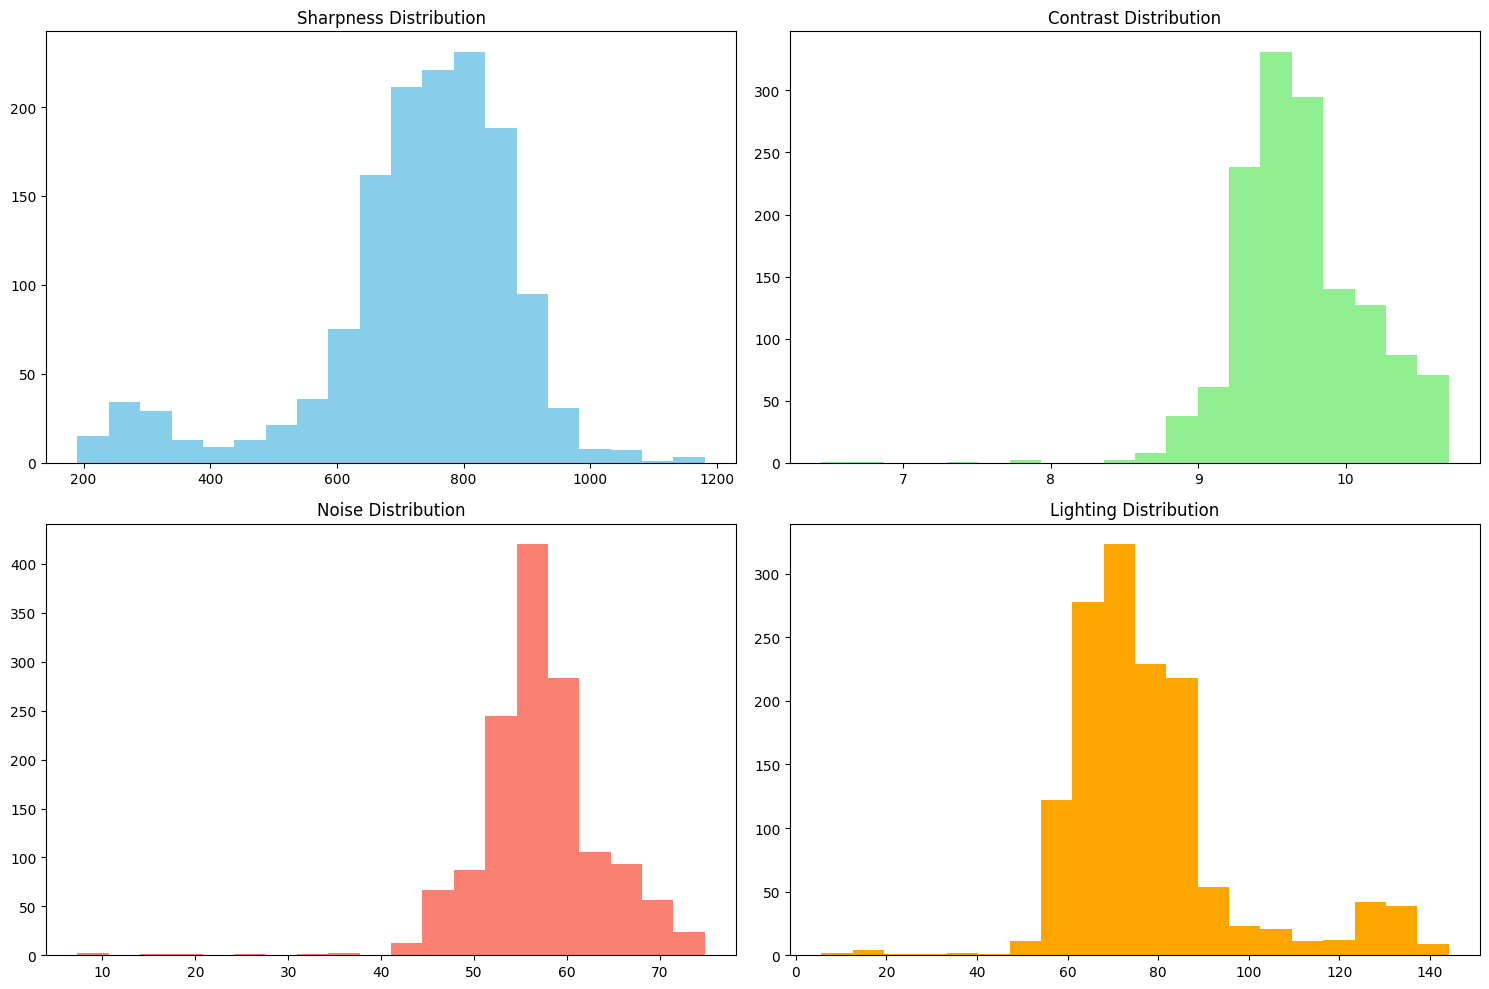

In [3]:
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

def compute_sharpness(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

def compute_contrast(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rms_contrast = np.sqrt(np.mean(gray_image**2))
    return rms_contrast

def compute_noise(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise_std = np.std(gray_image)
    return noise_std

def compute_lighting(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    return mean_brightness

def analyze_image_quality(root_folder):
    metrics = []
    
    for subdir, _, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subdir, filename)
                image = cv2.imread(image_path)
                
                if image is not None:
                    sharpness = compute_sharpness(image)
                    contrast = compute_contrast(image)
                    noise = compute_noise(image)
                    lighting = compute_lighting(image)
                    
                    metrics.append({
                        'folder': subdir,
                        'filename': filename,
                        'sharpness': sharpness,
                        'contrast': contrast,
                        'noise': noise,
                        'lighting': lighting
                    })
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

 
root_folder = 'evening rain calm sea/images'   

 
image_metrics_df = analyze_image_quality(root_folder)

 
image_metrics_df.to_csv('image_quality_metrics.csv', index=False)

print(image_metrics_df)

 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].hist(image_metrics_df['sharpness'], bins=20, color='skyblue')
axes[0, 0].set_title('Sharpness Distribution')

axes[0, 1].hist(image_metrics_df['contrast'], bins=20, color='lightgreen')
axes[0, 1].set_title('Contrast Distribution')

axes[1, 0].hist(image_metrics_df['noise'], bins=20, color='salmon')
axes[1, 0].set_title('Noise Distribution')

axes[1, 1].hist(image_metrics_df['lighting'], bins=20, color='orange')
axes[1, 1].set_title('Lighting Distribution')

plt.tight_layout()
plt.show()


                        folder           filename   sharpness   contrast  \
0    foggy and calm sea/images    0_CamFeed_0.png  721.438693   8.939120   
1    foggy and calm sea/images   0_CamFeed_10.png  113.358818  10.586949   
2    foggy and calm sea/images  0_CamFeed_100.png  114.706149  10.992755   
3    foggy and calm sea/images  0_CamFeed_101.png   71.898009  10.483377   
4    foggy and calm sea/images  0_CamFeed_102.png  120.923251  10.923341   
..                         ...                ...         ...        ...   
413  foggy and calm sea/images   0_CamFeed_92.png  135.384766  10.873063   
414  foggy and calm sea/images   0_CamFeed_93.png  143.100745  10.855836   
415  foggy and calm sea/images   0_CamFeed_96.png   87.848706  10.638870   
416  foggy and calm sea/images   0_CamFeed_97.png  122.877020  10.783970   
417  foggy and calm sea/images   0_CamFeed_99.png  116.157189  10.914899   

         noise    lighting  
0    28.710493   36.362834  
1    68.701813  125.932216  


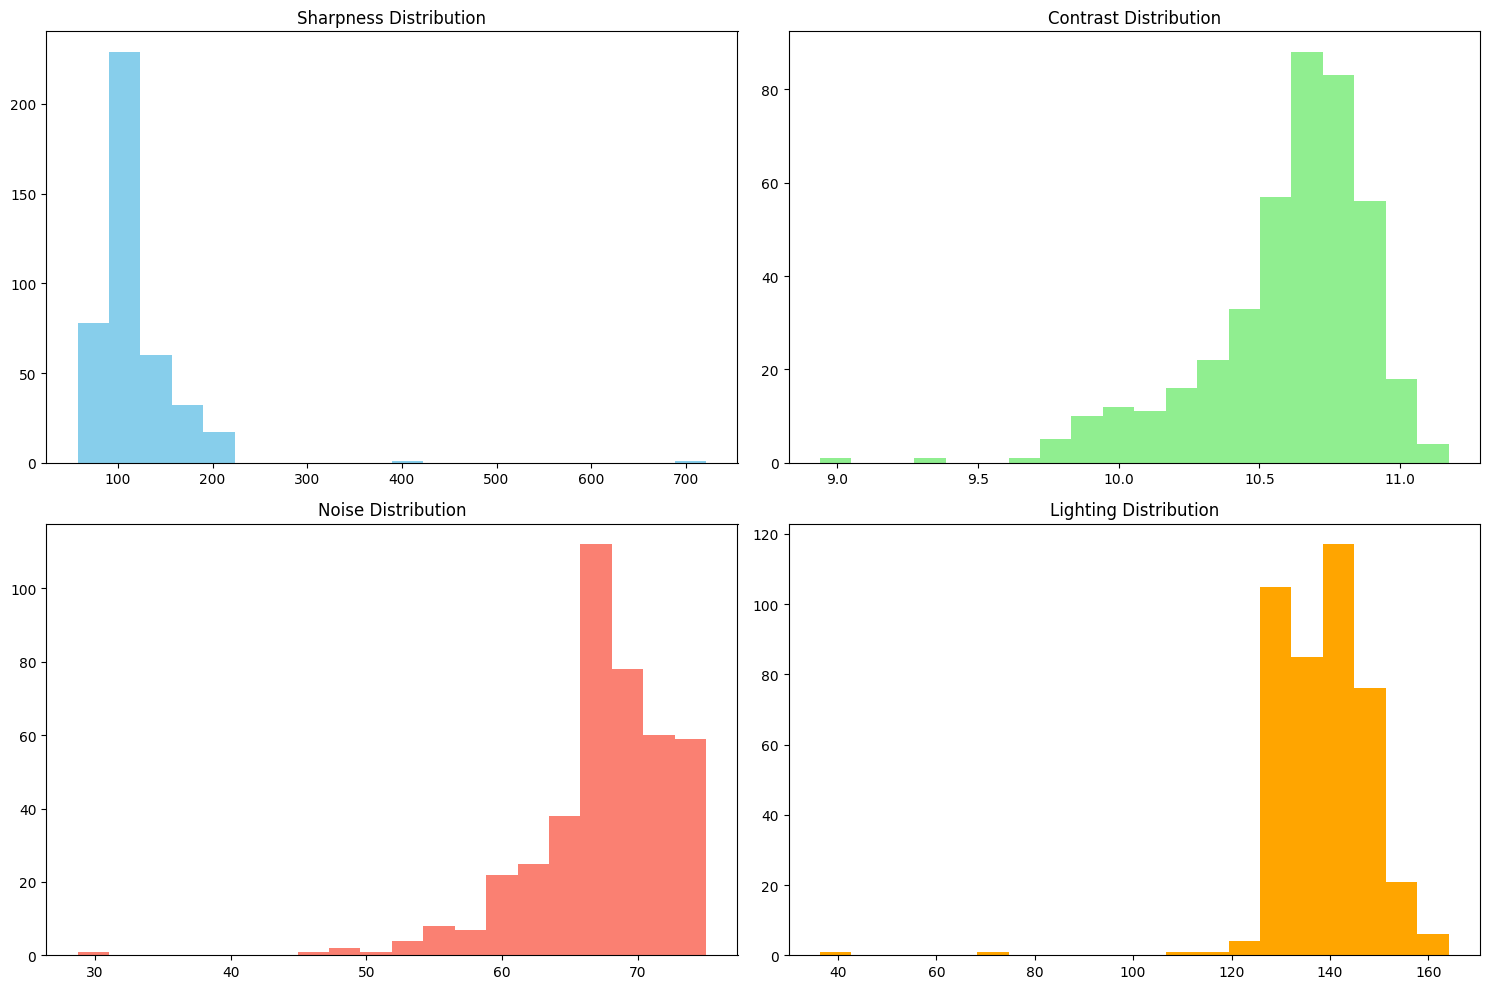

In [2]:
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

def compute_sharpness(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

def compute_contrast(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rms_contrast = np.sqrt(np.mean(gray_image**2))
    return rms_contrast

def compute_noise(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise_std = np.std(gray_image)
    return noise_std

def compute_lighting(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    return mean_brightness

def analyze_image_quality(root_folder):
    metrics = []
    
    for subdir, _, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subdir, filename)
                image = cv2.imread(image_path)
                
                if image is not None:
                    sharpness = compute_sharpness(image)
                    contrast = compute_contrast(image)
                    noise = compute_noise(image)
                    lighting = compute_lighting(image)
                    
                    metrics.append({
                        'folder': subdir,
                        'filename': filename,
                        'sharpness': sharpness,
                        'contrast': contrast,
                        'noise': noise,
                        'lighting': lighting
                    })
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

 
root_folder = 'foggy and calm sea/images'   

 
image_metrics_df = analyze_image_quality(root_folder)

 
image_metrics_df.to_csv('image_quality_metrics.csv', index=False)

print(image_metrics_df)

 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].hist(image_metrics_df['sharpness'], bins=20, color='skyblue')
axes[0, 0].set_title('Sharpness Distribution')

axes[0, 1].hist(image_metrics_df['contrast'], bins=20, color='lightgreen')
axes[0, 1].set_title('Contrast Distribution')

axes[1, 0].hist(image_metrics_df['noise'], bins=20, color='salmon')
axes[1, 0].set_title('Noise Distribution')

axes[1, 1].hist(image_metrics_df['lighting'], bins=20, color='orange')
axes[1, 1].set_title('Lighting Distribution')

plt.tight_layout()
plt.show()
